<a href="https://colab.research.google.com/github/nallagondu/DATASCIENCE-practice/blob/featurebranch/Logistic_Regression_boxplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logistic regression** is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on.

**Logistic regression**
Logistic regression, despite its name, is a classification model rather than regression model. Logistic regression is a simple and more efficient method for binary and linear classification problems. It is a classification model, which is very easy to realize and achieves very good performance with linearly separable classes. It is an extensively employed algorithm for classification in industry. The logistic regression model, like the Adaline and perceptron, is a statistical method for binary classification that can be generalized to multiclass classification. Scikit-learn has a highly optimized version of logistic regression implementation, which supports multiclass classification task (Raschka, 2015).

**why we are not using Linear regression model for Classification problems**
Linear regression models are not typically used for classification problems because they are not designed to handle categorical outcomes.

Here are a few reasons why linear regression is not suitable for classification problems:

**Output Range:** Linear regression predicts continuous values, which can span a wide range of real numbers. In classification problems, however, the output is typically categorical (e.g., binary classes like "yes" or "no", or multi-class labels like "cat", "dog", "horse"). Using linear regression could produce predictions outside the valid range of the target classes, leading to nonsensical results.

**Assumption Violation**: Linear regression assumes that the relationship between the independent variables and the dependent variable is linear. This may not hold true for classification problems where the decision boundaries between classes could be nonlinear.

**Interpretation Difficulty:** In classification, the focus is often on probabilities or class membership rather than predicting a specific continuous value. Linear regression outputs do not directly represent probabilities, making interpretation for classification problematic.

**Sensitive to Outliers:** Linear regression can be sensitive to outliers, and in classification problems, outliers may have a more significant impact on the decision boundary, potentially leading to misclassification.




The sigmoid function, also known as the logistic function, is a mathematical function commonly used in machine learning and statistics. It maps any real-valued number to a value between 0 and 1. The sigmoid function is defined as:

�
(
�
)
=
1
1
+
�
−
�
σ(z)=
1+e
−z

1
​


Where:

�
(
�
)
σ(z) is the output or the value of the sigmoid function.
�
z is the input, which can be any real number.
The sigmoid function has the following properties:

Range: The output of the sigmoid function is always in the range
[
0
,
1
]
[0,1], which makes it suitable for binary classification tasks where probabilities are needed.

Smoothness: The sigmoid function is smooth and continuously differentiable, which makes it suitable for optimization algorithms like gradient descent.

S-shape: The sigmoid function has an S-shaped curve. This property allows it to model non-linear relationships between variables.

Asymptotes: As
�
z approaches positive infinity,
�
(
�
)
σ(z) approaches 1, and as
�
z approaches negative infinity,
�
(
�
)
σ(z) approaches 0. This property is useful for interpreting the output of the sigmoid function as probabilities.

The sigmoid function is commonly used as the activation function in the output layer of binary classification neural networks, where it transforms the raw output of the network into probabilities of belonging to a particular class (e.g., class 1 vs. class 0). It's also used in logistic regression models, where it models the probability of the dependent variable belonging to a certain class given the independent variables.

**Evaluation of a classification model**

Evaluation of a classification model involves assessing its performance and how well it predicts the correct class labels for the given data. There are several metrics commonly used for evaluating classification models, including:

**Accuracy:** Accuracy measures the proportion of correctly classified instances out of the total instances. It is calculated as:
Accuracy=
Number of Correct Predictions/Total Number of Predictions

**Precision:** Precision measures the proportion of true positive predictions out of all positive predictions made by the model. It is calculated as:

Precision= True Positives/
True Positives+False Positives

​


**Recall (Sensitivity)**: Recall measures the proportion of true positive predictions out of all actual positive instances in the data. It is calculated as:
Recall= True Positives/
True Positives+False Negatives

**F1 Score:** The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is useful when the class distribution is imbalanced. It is calculated as:
F1 Score=2× Precision×Recall/
Precision+Recall

**Specificity:** Specificity measures the proportion of true negative predictions out of all actual negative instances in the data. It is calculated as:
Specificity= True Negatives/
True Negatives+False Positives

**ROC Curve (Receiver Operating Characteristic Curve):** The ROC curve is a graphical plot that illustrates the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) for different threshold values. The area under the ROC curve (AUC-ROC) is also commonly used as a metric to evaluate the overall performance of a classification model.

Confusion Matrix: A confusion matrix is a table that summarizes the performance of a classification model. It provides a breakdown of the number of true positive, true negative, false positive, and false negative predictions made by the model.

The choice of evaluation metric depends on the specific characteristics of the classification problem and the priorities of the stakeholders. For example, in a highly imbalanced dataset, accuracy may not be an informative metric, and metrics like precision, recall, and F1 score may be more appropriate. Similarly, in applications where the cost of false positives and false negatives differs, metrics like precision-recall curves may provide more insight into the model's performance.

**https://in.mathworks.com/campaigns/offers/next/choosing-the-best-machine-learning-classification-model-and-avoiding-overfitting.html**

**Scikit-learning.org**
**Problem Statement: **

Based on the pima Indians Historical diabetes data ,build a machine learning binary classification model to predect if the person is diabetic or not based on below feature

Pregnancies,Glocose ,Blood Pressure,Skin Thickness,Insulin,BMI,DiabetesPredigreeFunction,Age

**Label**

Outcome

In [1]:
#let's start with importing necessory libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# GitHub raw file URL
url = "https://raw.githubusercontent.com/nallagondu/datatrained-training-ml-Files/main/diabetes.csv"
data = pd.read_csv(url)

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


as per above data some data is squed ,

it seems that there are no missing values in our data,great lets work on data Preprocessing


**DATA Preprocessing **

1.Data Cleaning

2.EDA Analysis

3.Finding and treating outliers(if any)

4.Feature selection for model building

5.Data Standardization



In [6]:
#replace zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [7]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can see there is some skewness in the data ,lets deal with data


Now we can have dealt with the 0  values and data looks better . but there still are outliers present in some columns.
Lets deal with them

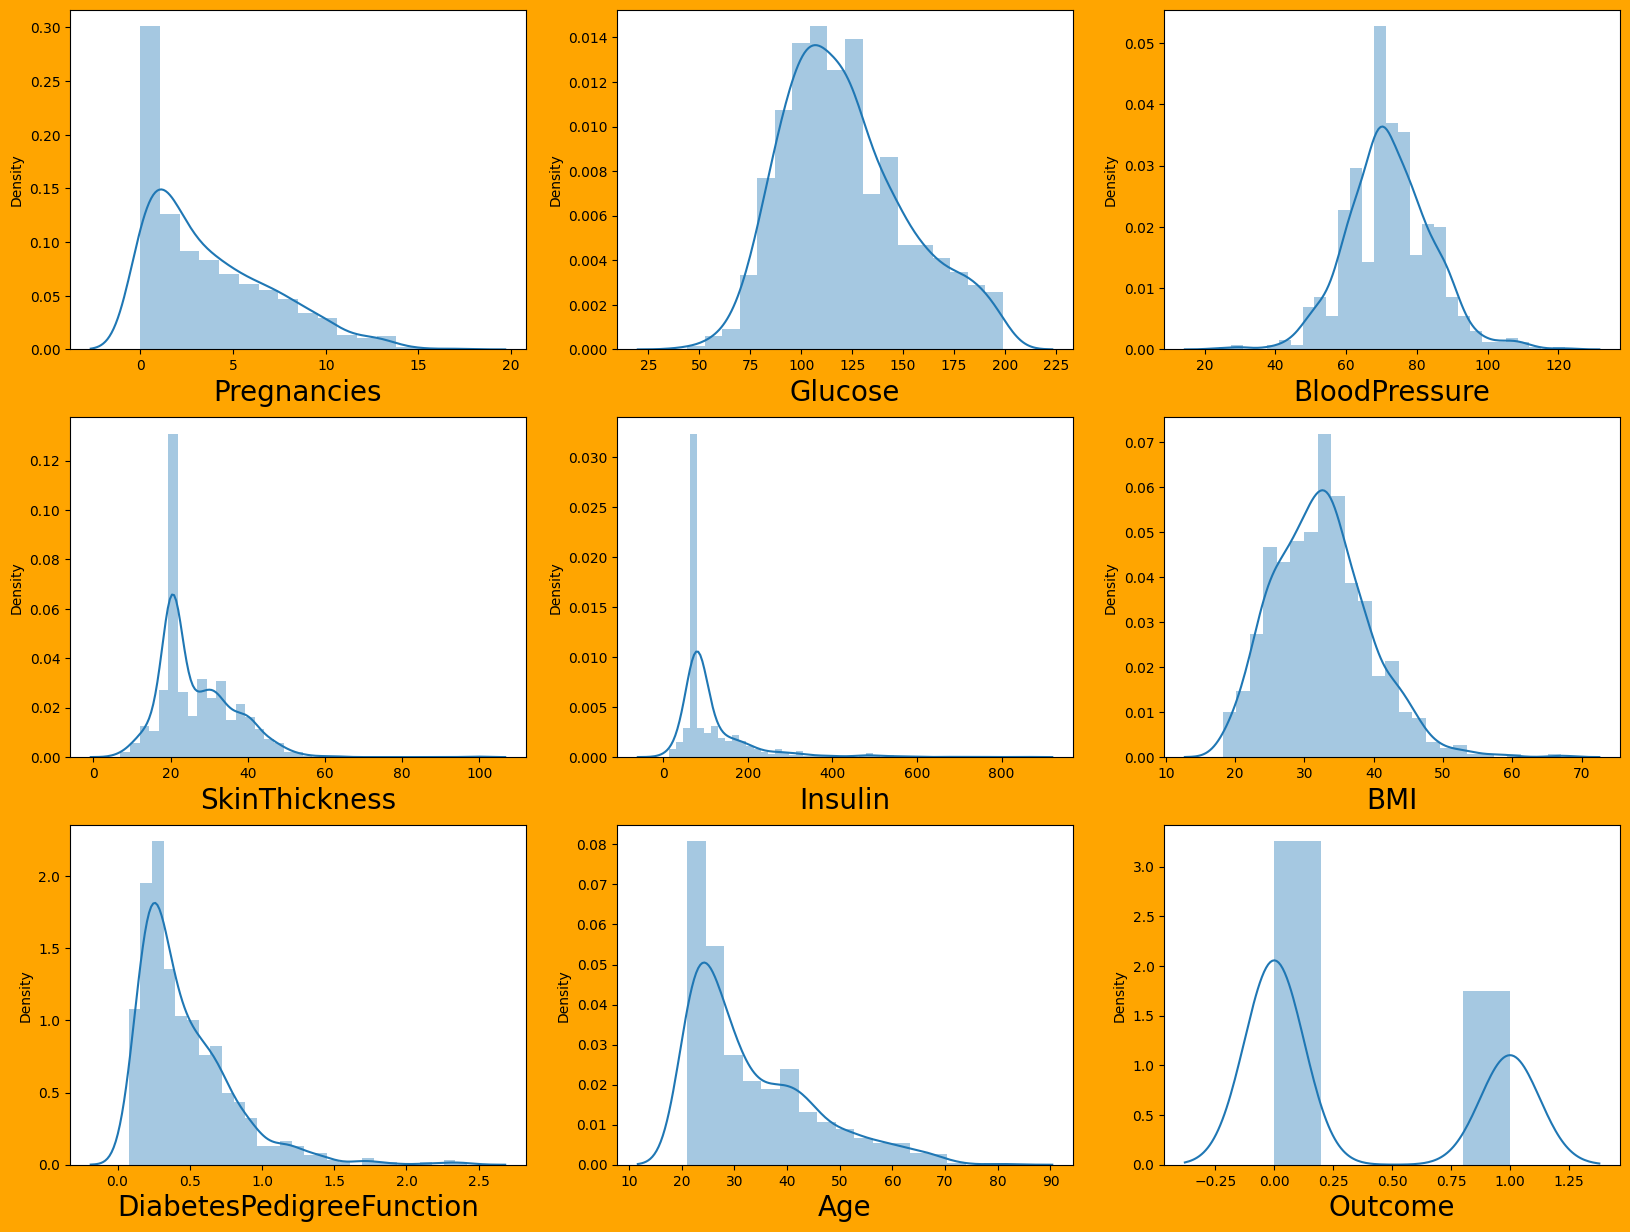

In [9]:
#lets see how the data is distributed for every column

plt.figure(figsize=(20,15), facecolor='orange')
plotnumber = 1

for column in data:
    if plotnumber<=9: # as there are 9 columns in the data
         ax = plt.subplot(3,3,plotnumber)
         sns.distplot(data[column])
         plt.xlabel(column,fontsize=20)

    plotnumber+=1
plt.show()

In [10]:
#Now we have deal with the zero 0 values and data looks better. but there stillare outliers present in some columns.Lets deal with them
df_features = data.drop('Outcome', axis=1)

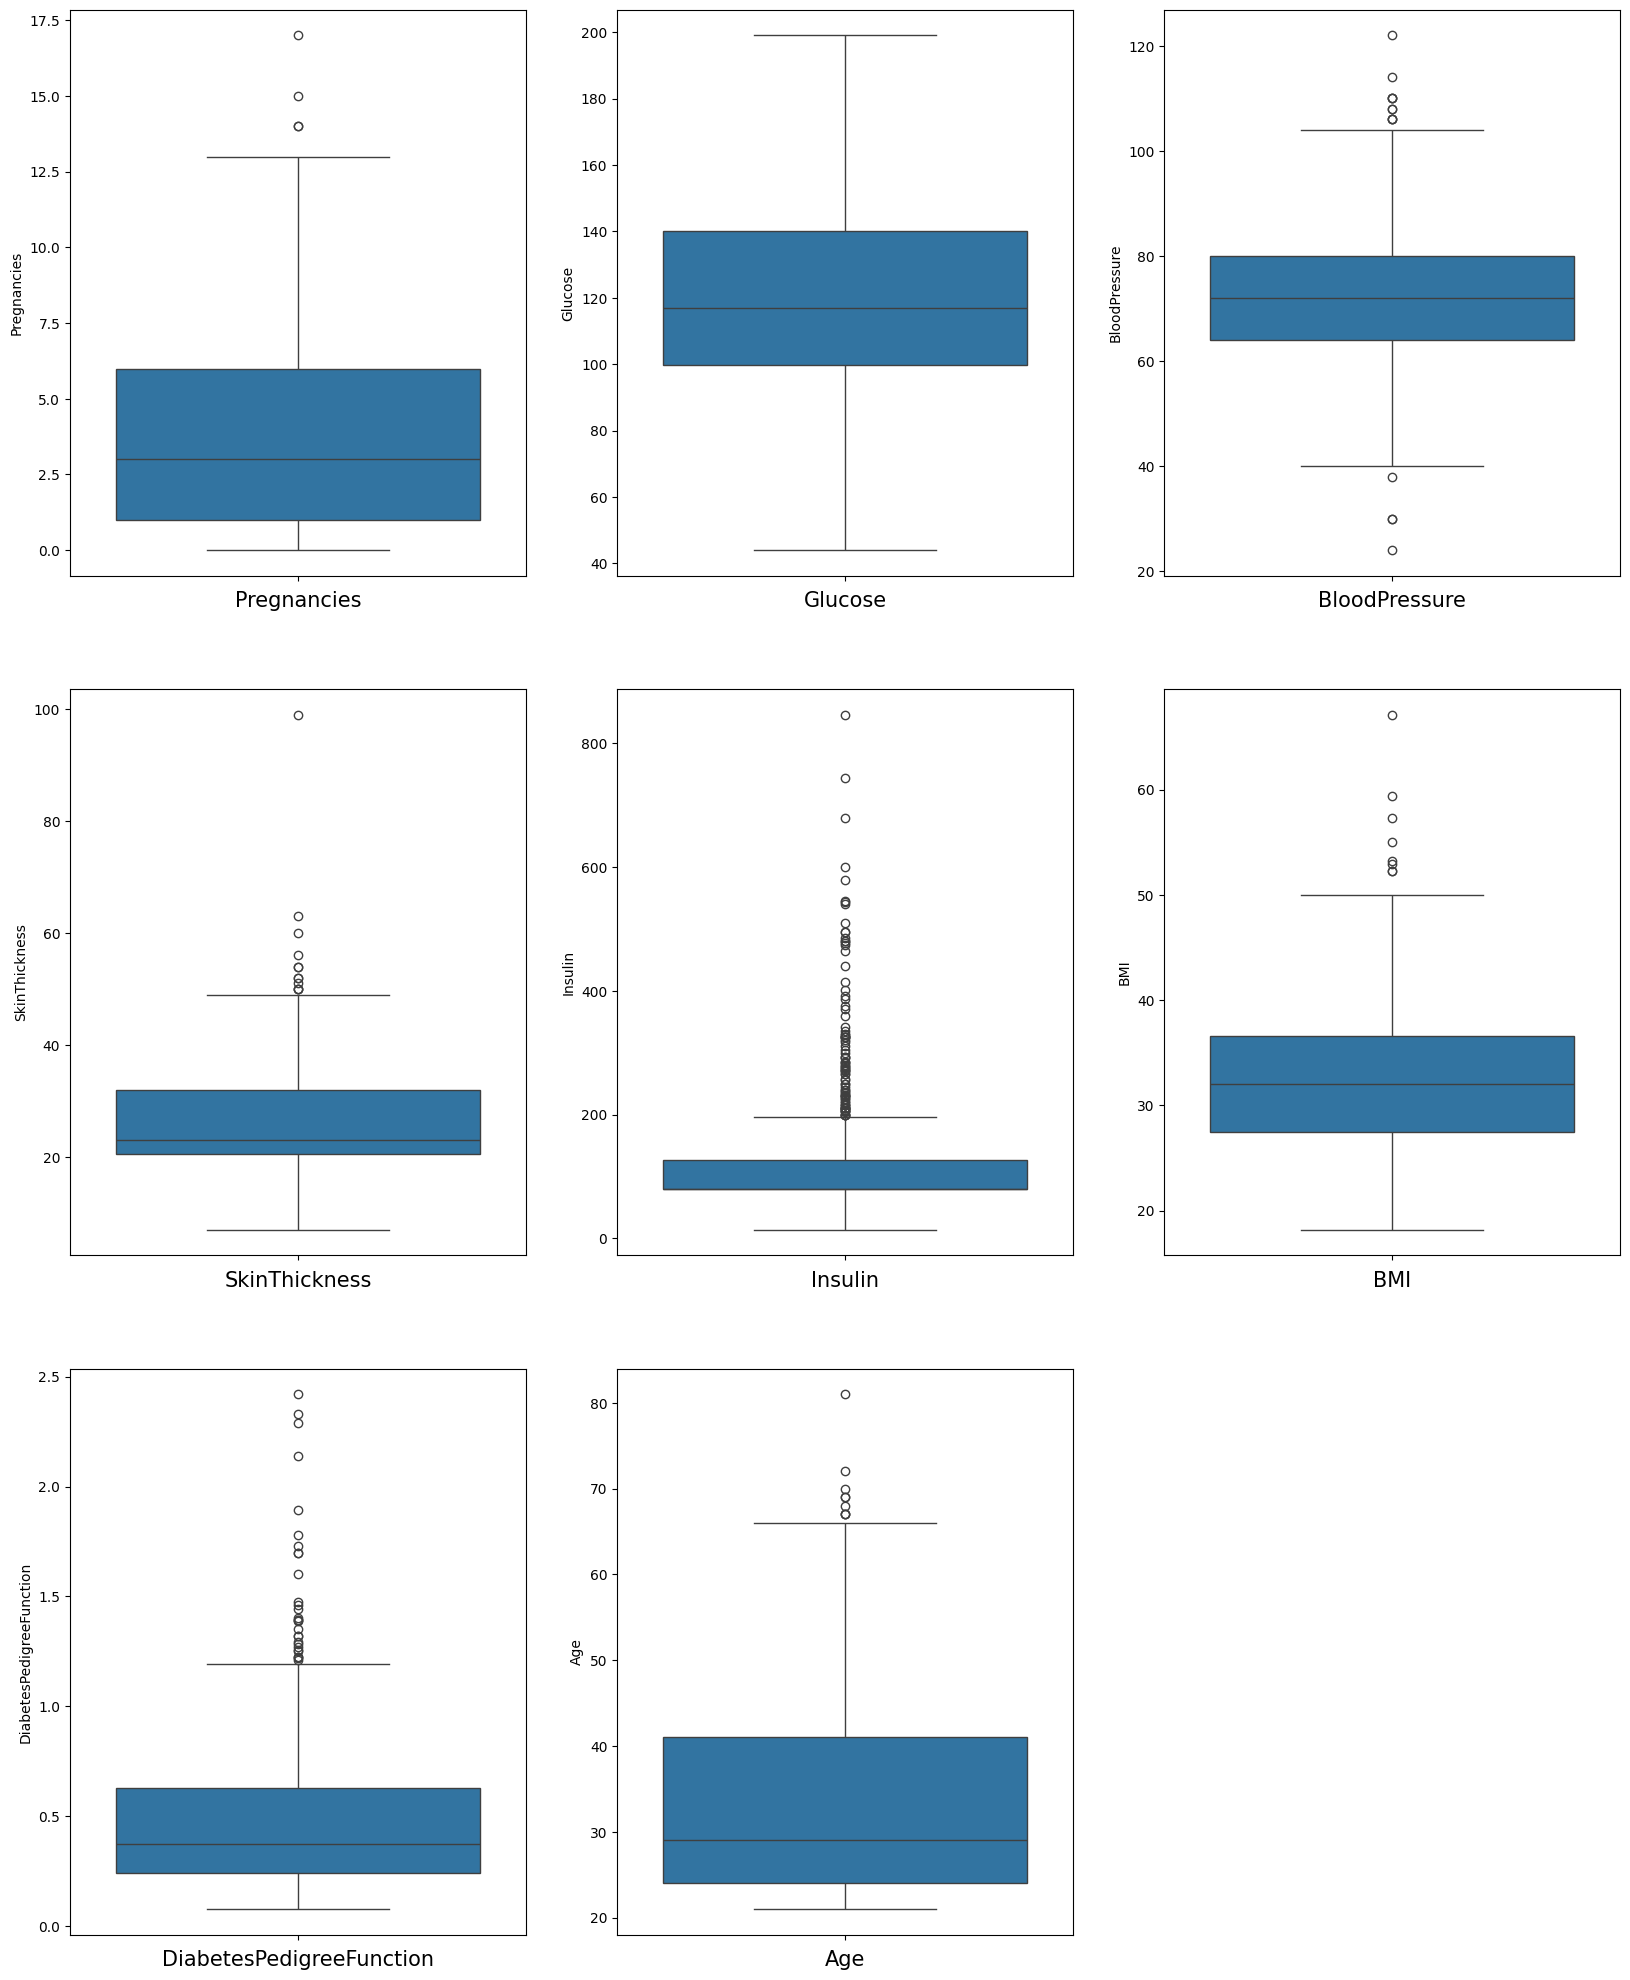

In [11]:
#Visualize the outliers using boxplot

plt.figure(figsize=(20,25))
graph = 1

for column in df_features:
    if graph<=9: # as there are 9 columns in the data
         plt.subplot(3,3,graph)
         ax=sns.boxplot(data = df_features[column])
         plt.xlabel(column,fontsize=15)

    graph+=1
plt.show()

In [12]:
data.shape

(768, 9)

In [13]:
#find the IQR to identify outliers
#1st Quantile
q1 = data.quantile(0.25)

#3rd Quantile
q3 = data.quantile(0.75)

#IQR
iqr = q3 - q1

In [14]:
q1


Pregnancies                  1.000000
Glucose                     99.750000
BloodPressure               64.000000
SkinThickness               20.536458
Insulin                     79.799479
BMI                         27.500000
DiabetesPedigreeFunction     0.243750
Age                         24.000000
Outcome                      0.000000
Name: 0.25, dtype: float64

In [15]:
q3

Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64

**Outlier detection formula**
Higher side ==> Q3 + (1.5*IQR)

lower SIDE ==> Q1-(1.5 * IQR)


In [16]:
#validating one outlier
preg_high = (q3.Pregnancies + (1.5 *iqr.Pregnancies))
preg_high

13.5

In [17]:
#Check the Index which have higher values
np_index = np.where(data['Pregnancies']> preg_high)
np_index

(array([ 88, 159, 298, 455]),)

In [18]:
data = data.drop(data.index[np_index])
data.shape

(764, 9)

In [19]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
759,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
760,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
761,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
762,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [20]:
bp_high = (q3.BloodPressure + (1.5 * iqr.BloodPressure))
print(bp_high)
index = np.where(data['BloodPressure'] > bp_high)

data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

104.0
(754, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
749,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
750,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
751,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
752,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [21]:
index

(array([ 43,  84, 105, 175, 359, 545, 654, 658, 668, 687]),)

In [22]:
st_high = (q3.SkinThickness + (1.5 * iqr.SkinThickness))
print(st_high)
index = np.where(data['SkinThickness'] > st_high)

data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

49.1953125
(742, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
737,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
738,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
739,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
740,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [23]:
pr_high = (q3.Pregnancies + (1.5 * iqr.Pregnancies))
print(pr_high)
index = np.where(data['Pregnancies'] > pr_high)

data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

13.5
(742, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
737,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
738,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
739,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
740,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [24]:
ins_high = (q3.Insulin + (1.5 * iqr.Insulin))
print(ins_high)
index = np.where(data['Insulin'] > ins_high)

data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

198.42578125
(657, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
652,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
653,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
654,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
655,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [25]:
gl_high = (q3.Glucose + (1.5 * iqr.Glucose))
print(gl_high)
index = np.where(data['Glucose'] > gl_high)

data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

201.0
(657, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
652,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
653,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
654,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
655,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [26]:
dpf_high = (q3.DiabetesPedigreeFunction + (1.5 * iqr.DiabetesPedigreeFunction))
print(dpf_high)
index = np.where(data['DiabetesPedigreeFunction'] > dpf_high)

data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

1.2
(634, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
629,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
630,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
631,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
632,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [27]:
bmi_high = (q3.BMI + (1.5 * iqr.BMI))
print(bmi_high)
index = np.where(data['BMI'] > bmi_high)

data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

50.25
(631, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
626,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
627,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
628,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
629,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [28]:
age_high = (q3.Age + (1.5 * iqr.Age))
print(age_high)
index = np.where(data['Age'] > age_high)

data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

66.5
(622, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
617,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
618,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
619,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
620,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [29]:
bp_low = (q1.BloodPressure - (1.5 * iqr.BloodPressure))
print(bp_low)
index = np.where(data['BloodPressure'] < bp_low)

data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

40.0
(619, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
614,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
615,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
616,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
617,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


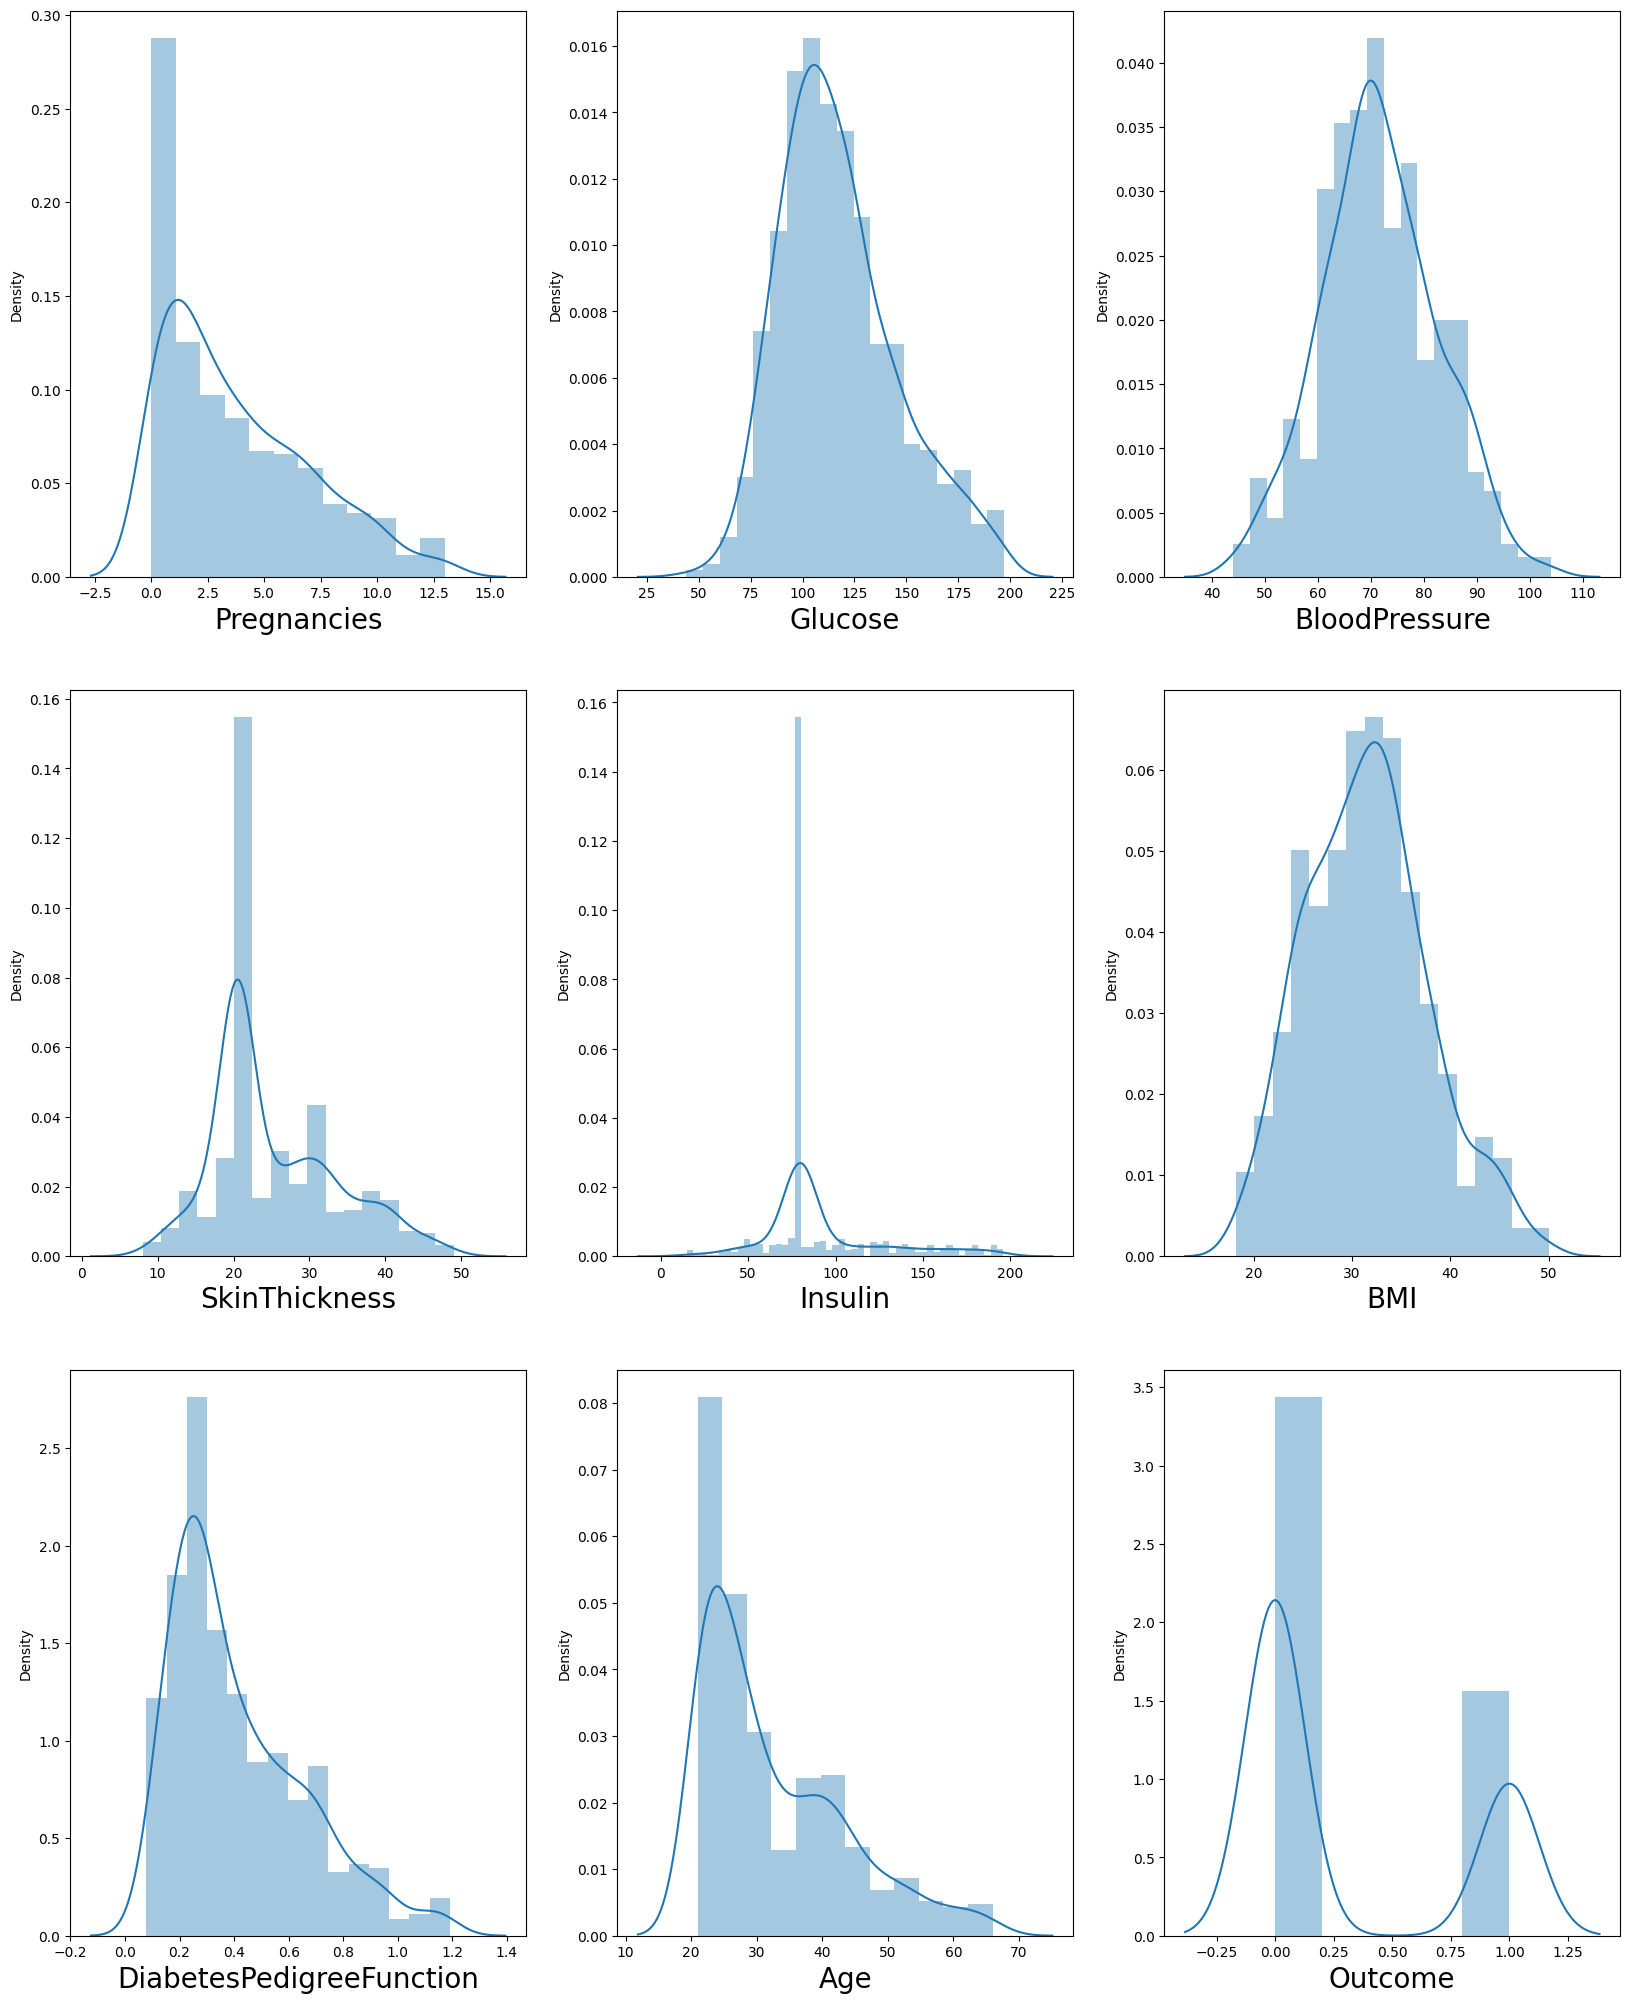

In [30]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in data:
    if plotnumber<=9: # as there are 9 columns in the data
         ax = plt.subplot(3,3,plotnumber)
         sns.distplot(data[column])
         plt.xlabel(column,fontsize=20)

    plotnumber+=1
plt.show()

The data looks much better ow than brfore . we will start our analysis with this data row as we don't want to lose importane information.

if our model doesn't work with accuracy ,we will come back for more preprocessing

In [31]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

Before we fit our data toa model,lets visualize the relation ship between our independent variable and the categories

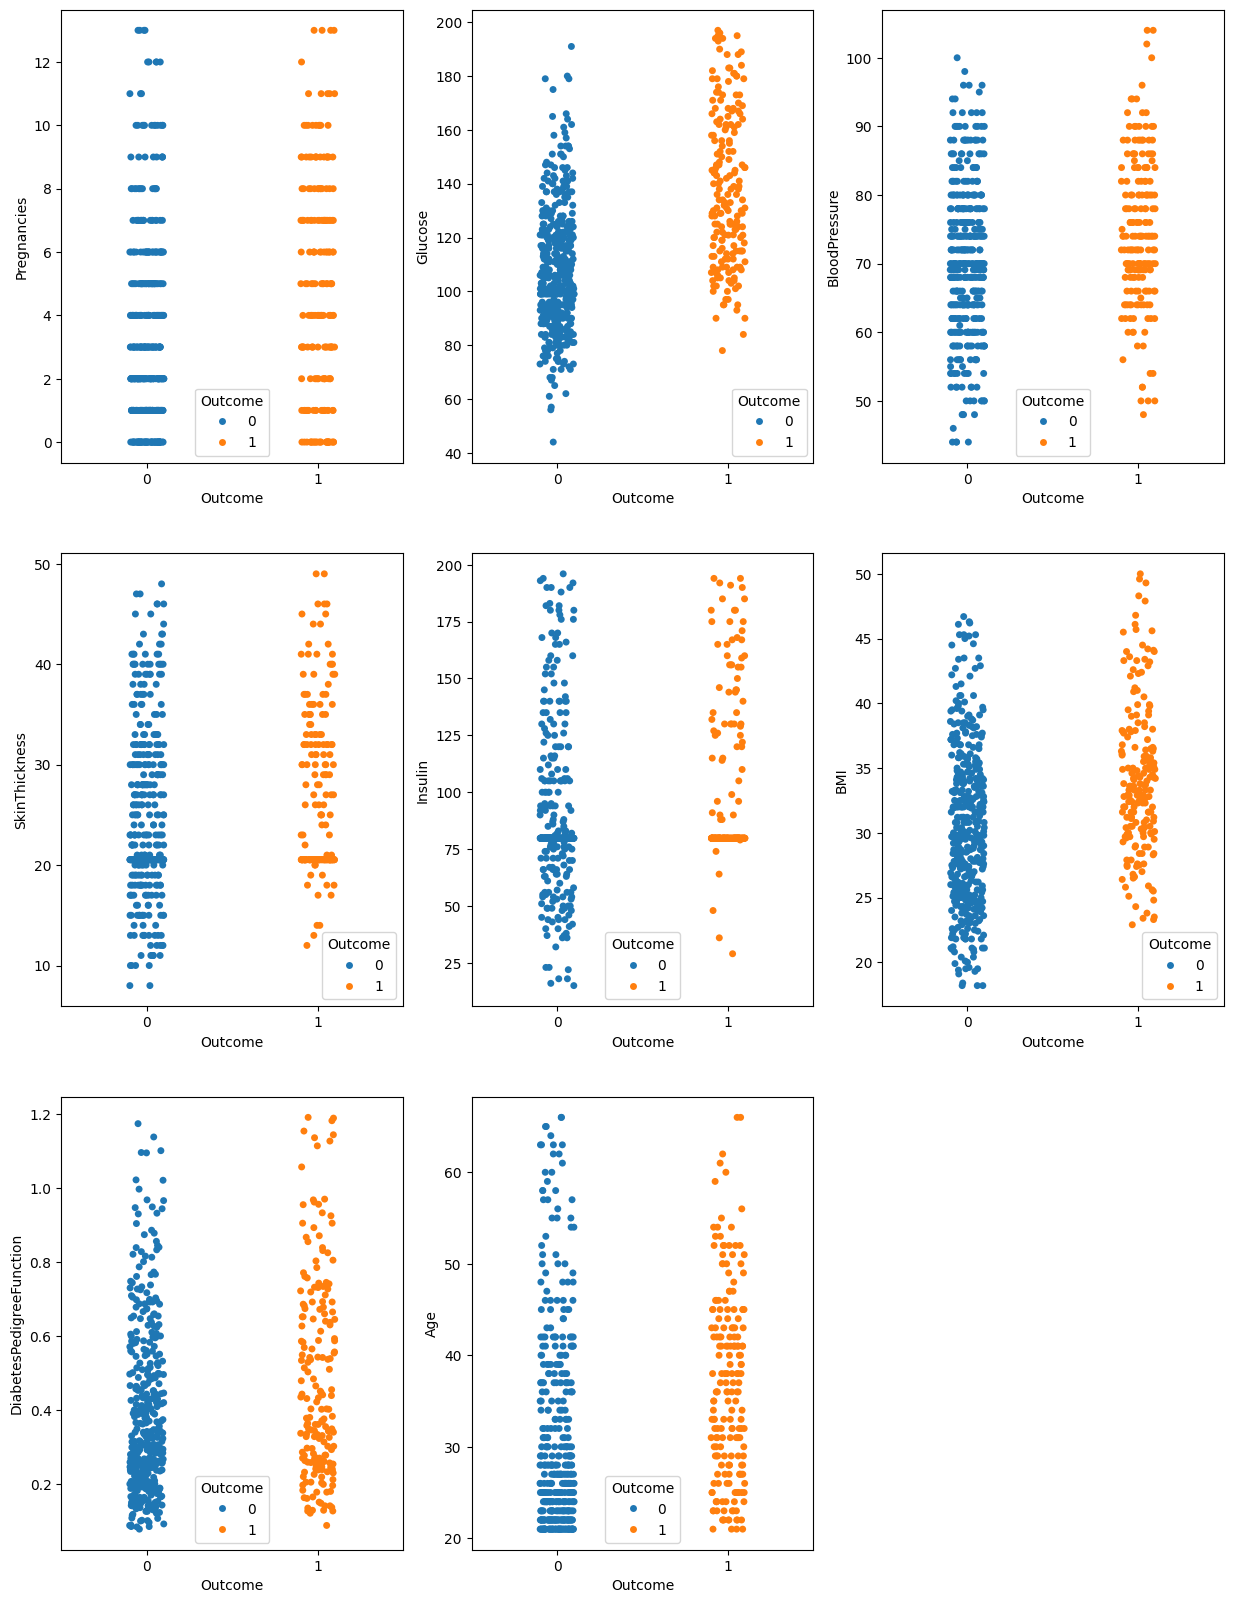

In [32]:
# let's see how features are related to class
plt.figure( figsize=(15,20))
plotnumber = 1
for column in X:
    if plotnumber <=9:
      ax = plt.subplot(3,3,plotnumber)
      sns.stripplot(x=y,y=X[column],hue=y)
    plotnumber+=1
plt.show()



**Check multicollinearity problem. Find if one feature is dependent on another feature**

In [33]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

This is the data looks now after scaling.

In [34]:
X_scaled.shape[1]

8

In [35]:
#Finding variance inflation factor in each scaled column i.e X_Scaled.shape[1] (1/1-r2))

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#Let's check the values
vif


,vif,Features
0,1.448654,Pregnancies
1,1.250247,Glucose
2,1.258898,BloodPressure
3,1.411508,SkinThickness
4,1.200759,Insulin
5,1.447599,BMI
6,1.038530,DiabetesPedigreeFunction
7,1.659799,Age


ALL the VIF values are less than 5 and are very low .

That means no multicollinearity.

Now we can go head with fiting our data to the model .

Before that ,let's split our data in test and traing set

In [36]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

**Pre-Processing Steps completed**



**Model Building --> **

In [37]:
log_reg = LogisticRegression( )
log_reg.fit(x_train,y_train)

LogisticRegression()

In [38]:
# lets see how well our model performs on the data set
y_pred = log_reg.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0])

In [40]:
log_reg.predict_proba(x_test)


array([[0.27644852, 0.72355148],
       [0.9884465 , 0.0115535 ],
       [0.71320913, 0.28679087],
       [0.41727663, 0.58272337],
       [0.65256166, 0.34743834],
       [0.16747081, 0.83252919],
       [0.67217673, 0.32782327],
       [0.96760466, 0.03239534],
       [0.83090765, 0.16909235],
       [0.70960968, 0.29039032],
       [0.61236335, 0.38763665],
       [0.82448072, 0.17551928],
       [0.55924335, 0.44075665],
       [0.52295435, 0.47704565],
       [0.25325268, 0.74674732],
       [0.97019571, 0.02980429],
       [0.49845311, 0.50154689],
       [0.91072363, 0.08927637],
       [0.97768536, 0.02231464],
       [0.64897542, 0.35102458],
       [0.52870881, 0.47129119],
       [0.78479246, 0.21520754],
       [0.78466007, 0.21533993],
       [0.44685677, 0.55314323],
       [0.75832183, 0.24167817],
       [0.35577336, 0.64422664],
       [0.69081478, 0.30918522],
       [0.62136906, 0.37863094],
       [0.94699644, 0.05300356],
       [0.64984246, 0.35015754],
       [0.

In [41]:
#model accuracy
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7612903225806451

In [42]:
#confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[94, 11],
       [26, 24]])

Lets Check accuracy Manually
accuracy = (TP +TN)/
(TP +TN+FP+FN)




In [ ]:
94+24/(94+24+26+24)

**Simalarly we can manulally calculate recall/precisision/F1-score**

In [43]:
from sklearn.metrics import classification_report

In [44]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       105
           1       0.69      0.48      0.56        50

    accuracy                           0.76       155
   macro avg       0.73      0.69      0.70       155
weighted avg       0.75      0.76      0.75       155



In [45]:
#ROC Curve
fpr,tpr, thresholds = roc_curve(y_test, y_pred)

In [46]:
#thresholds[0] means no instances predicted (it should be read form 0 -max )
print('Threshold =',thresholds)
print('True Positive rate =', tpr)
print('False Position rate =',fpr)

Threshold = [2 1 0]
True Positive rate = [0.   0.48 1.  ]
False Position rate = [0.        0.1047619 1.       ]


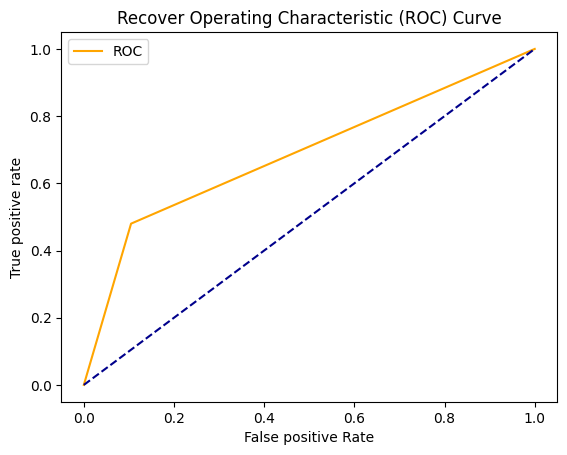

In [49]:
plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='--')

plt.xlabel('False positive Rate')
plt.ylabel('True positive rate')
plt.title('Recover Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [50]:
#How much area it is covering (AUC)
auc_score = roc_auc_score(y_test,y_pred)
print(auc_score)

0.6876190476190477


**what is the significence of ROC curve and AUC**

The Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) are important tools for evaluating the performance of binary classification models. Here's the significance of each:

**ROC Curve:**

The ROC curve is a graphical representation of the trade-off between the true positive rate (TPR) and the false positive rate (FPR) as the discrimination threshold of a binary classifier varies.
The true positive rate (TPR), also known as sensitivity or recall, measures the proportion of actual positive cases that are correctly classified as positive by the model.
The false positive rate (FPR) measures the proportion of actual negative cases that are incorrectly classified as positive by the model.
The ROC curve plots TPR against FPR at various threshold settings, providing a comprehensive view of the model's performance across different classification thresholds.
A diagonal line from the bottom-left corner to the top-right corner represents random guessing (an AUC of 0.5). A good classifier has an ROC curve that bows upward toward the top-left corner, indicating higher TPRs at lower FPRs.
Area Under the Curve (AUC):

The AUC represents the area under the ROC curve and quantifies the overall performance of a binary classification model across all possible classification thresholds.
AUC ranges from 0 to 1, where 0.5 indicates a random classifier (no predictive power), and 1 indicates a perfect classifier.
A higher AUC value indicates better discrimination ability of the model: a model with an AUC of 0.8 is generally considered better than a model with an AUC of 0.7.
AUC is robust to class imbalance and classification threshold selection, making it a popular metric for evaluating the performance of binary classifiers.
---
**k-Nearest Neighbors(KNN)**
K-Nearest Neighbors (KNN) is a simple and versatile machine learning algorithm used for both classification and regression tasks. Here's an overview of how it works and its key characteristics:

How it Works:

Given a new, unseen data point, KNN finds the K closest data points in the training set based on a distance metric (typically Euclidean distance).
For classification tasks, KNN predicts the class label of the new data point by a majority vote among its K nearest neighbors.
For regression tasks, KNN predicts the target value of the new data point by averaging the target values of its K nearest neighbors.
Hyperparameter K:

The choice of K (number of neighbors) is a critical hyperparameter in KNN.
A smaller K value results in more complex decision boundaries and higher variance (more susceptible to noise), while a larger K value leads to smoother decision boundaries and lower variance (but potentially higher bias).
The optimal K value is often determined through cross-validation or other model selection techniques.
Distance Metric:

The choice of distance metric affects how KNN calculates the distance between data points.
Euclidean distance is commonly used, but other distance metrics such as Manhattan distance, Minkowski distance, or cosine similarity can also be used depending on the nature of the data.
Lazy Learner:

KNN is often referred to as a "lazy learner" because it does not learn a model during the training phase. Instead, it memorizes the training data and makes predictions at inference time based on the nearest neighbors.
This makes KNN computationally expensive during inference, especially for large datasets, as it requires calculating distances to all training data points.
Non-parametric:

KNN is a non-parametric algorithm, meaning it makes no assumptions about the underlying distribution of the data.
It is particularly useful for nonlinear data distributions and can capture complex patterns in the data without imposing specific functional forms.
Scalability:

While KNN is simple and intuitive, it may not be the most scalable algorithm for large datasets or high-dimensional data due to its computational overhead during inference.
Approximate nearest neighbor algorithms or dimensionality reduction techniques may be employed to mitigate scalability issues.
Imbalanced Data:

KNN may struggle with imbalanced datasets, where one class significantly outnumbers the other(s), as it tends to predict the majority class more frequently.
Techniques such as weighted voting or resampling can help address imbalanced class distributions.

**overall, KNN is a flexible and easy-to-understand algorithm suitable for various machine learning tasks, especially when the dataset is relatively small, and interpretability is essential. However, its scalability and computational efficiency may pose challenges for larger datasets, and careful tuning of hyperparameters is crucial for optimal performance.**


 let's walk through a simple example of using K-Nearest Neighbors (KNN) for classification. In this example, we'll use the famous Iris dataset, which contains samples of iris flowers and their corresponding species.

python
Copy code
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target variable (species)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the KNN classifier
k = 3  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Step 4: Make predictions on the testing set
y_pred = knn.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
In this example:

We load the Iris dataset using scikit-learn's load_iris function. This dataset contains 150 samples of iris flowers, each with four features (sepal length, sepal width, petal length, petal width) and a target variable indicating the species of iris.
We split the dataset into training and testing sets using train_test_split function. We use 80% of the data for training and 20% for testing.
We initialize a KNN classifier with n_neighbors=3 and train it on the training data using the fit method.
We make predictions on the testing set using the predict method.
Finally, we evaluate the model's performance using the accuracy score, which measures the proportion of correctly classified instances in the testing set.
You can experiment with different values of k (number of neighbors) and explore other metrics for evaluating the model's performance. Additionally, you can visualize the decision boundaries of the KNN classifier to gain insights into how it separates different classes in the feature space.

**"Lazy learner"** is a term used to describe a class of machine learning algorithms that defer the process of building a model during the training phase. Instead, they simply store the training data and make predictions at inference time by comparing the new instance to the training instances. K-Nearest Neighbors (KNN) is a classic example of a lazy learner.

Here are some key characteristics of lazy learners:

**Deferred Learning:** Lazy learners do not generalize from the training data to build a model. Instead, they memorize the training instances and defer the learning process until inference time.

**Instance-Based Learning:** Lazy learners make predictions by comparing the new instance to the training instances based on similarity measures (e.g., distance metrics). The prediction is based on the instances nearest to the new instance in the feature space.

**No Explicit Training Phase**: Since lazy learners do not build a model during training, there is no explicit training phase. They simply store the training data in memory and use it directly for making predictions.

**Computational Cost at Inference:** The computational cost of lazy learners is typically higher during inference compared to eager learners (models that build a model during training). This is because lazy learners need to search the entire training dataset to find the nearest neighbors for each new instance.

**Flexibility and Adaptability:** Lazy learners can adapt to changes in the training data without retraining the model. They can easily incorporate new instances into the existing dataset and update predictions accordingly.

**Interpretability:** Lazy learners often provide more interpretable predictions since they rely directly on the training instances. The decision-making process is transparent and can be understood by examining the nearest neighbors.

Sensitive to Noise: Lazy learners can be sensitive to noisy or irrelevant features in the training data since they consider all features during prediction. Preprocessing techniques such as feature scaling and feature selection may be necessary to improve performance.

**Pros and Cons of KNN algorthem ? **

**Pros:**

Simple and Intuitive: KNN is easy to understand and implement, making it a good choice for beginners and as a baseline model for comparison with more complex algorithms.

No Assumptions about Data Distribution: KNN is a non-parametric algorithm, meaning it makes no assumptions about the underlying distribution of the data. It can capture complex patterns and is suitable for datasets with non-linear decision boundaries.

Versatile: KNN can be used for both classification and regression tasks, making it a versatile algorithm that can handle a wide range of machine learning problems.

No Training Phase: KNN does not require a training phase. It simply stores the training data and makes predictions based on the similarity to the nearest neighbors at inference time. This makes it suitable for online learning and adapting to new data in real-time.

Interpretability: KNN provides transparent and interpretable predictions, as the decision-making process is based on the nearest neighbors in the feature space. It's easy to understand why a particular prediction was made by examining the neighbors.

**Cons:**

Computational Complexity: KNN has a high computational cost during inference, especially for large datasets or high-dimensional feature spaces. It requires calculating distances to all training instances, which can be time-consuming.

Memory Intensive: Since KNN stores all training data in memory, memory usage can become a bottleneck for large datasets with many instances or features.

Sensitivity to Noise and Irrelevant Features: KNN is sensitive to noisy data and irrelevant features, as it considers all features during prediction. Preprocessing techniques such as feature scaling and feature selection may be necessary to improve performance.

Need for Optimal K: The performance of KNN heavily depends on the choice of the hyperparameter K (number of neighbors). Selecting an optimal value of K is crucial and may require experimentation and cross-validation.

Imbalanced Data: KNN may struggle with imbalanced datasets, where one class significantly outnumbers the others. It tends to predict the majority class more frequently, leading to biased predictions.

**Python Emplementation  **

